In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm

In [2]:
#proton_selection = "SingleRP"
proton_selection = "MultiRP"

## Signal

In [3]:
df_signal = None
event_counts_signal = None
selections_str_signal = None

#with h5py.File('output/output-MC2017-Elastic-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-Elastic-ExclSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-SingleDissociation-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-SingleDissociation-ExclSel.h5', 'r') as f:  

fileName_signal = 'output/output-MC2017-Elastic-PreSel.h5'

with h5py.File( fileName_signal, 'r' ) as f:
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts_signal = list( dset_counts )
    print ( event_counts_signal )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str_signal = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str_signal )
    
    df_signal = pd.DataFrame( dset, columns=columns_str )
    
    df_signal = df_signal[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
                            'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                            'Xi', 'T', 'ThX', 'ThY', 'Time',
                            'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
    

['columns', 'event_counts', 'protons', 'selections']
(212317, 38)
[[1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 9.13764843e-04
  2.35298625e-02 4.41197067e-03]
 [1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 8.79983866e-04
  4.58796041e-03 8.15103097e-02]
 [1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 8.79983866e-04
  4.58796041e-03 8.15103097e-02]
 ...
 [1.00000000e+00 7.56000000e+02 4.29496730e+09 ... 1.85212595e-04
  3.62914948e-02 3.05966531e-03]
 [1.00000000e+00 7.56000000e+02 4.29496730e+09 ... 1.85212595e-04
  3.62914948e-02 3.05966531e-03]
 [1.00000000e+00 7.56000000e+02 4.29496730e+09 ... 1.50995244e-04
  2.04409396e-02 4.87857127e-03]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon0

In [4]:
df_counts_signal = pd.Series( event_counts_signal, index=selections_str_signal );
df_counts_signal

All        178402
Muon       166756
Vertex     149608
Protons     90874
dtype: int64

In [5]:
msk_sig = ( df_signal["InvMass"] >= 110. )

msk1_sig = None
msk2_sig = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_arm = ( df_signal["RPId1"] == 23 )
    msk2_arm = ( df_signal["RPId1"] == 123 )
    df_signal[ "XiMuMu" ] = np.nan
    df_signal[ "XiMuMu" ].where( ~msk1_arm, df_signal[ "XiMuMuPlus" ], inplace=True )
    df_signal[ "XiMuMu" ].where( ~msk2_arm, df_signal[ "XiMuMuMinus" ], inplace=True )
    #df_signal[ "XiMuMu" ][ msk2_arm ] = df_signal[ "XiMuMuMinus" ] 
    msk1_sig = msk_sig & ( df_signal["MultiRP"] == 0) & msk1_arm
    msk2_sig = msk_sig & ( df_signal["MultiRP"] == 0) & msk2_arm
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_arm = ( df_signal["Arm"] == 0 )
    msk2_arm = ( df_signal["Arm"] == 1 )
    df_signal[ "XiMuMu" ] = np.nan
    df_signal[ "XiMuMu" ].where( ~msk1_arm, df_signal[ "XiMuMuPlus" ], inplace=True )
    df_signal[ "XiMuMu" ].where( ~msk2_arm, df_signal[ "XiMuMuMinus" ], inplace=True )
    msk1_sig = msk_sig & ( df_signal["MultiRP"] == 1 ) & msk1_arm
    msk2_sig = msk_sig & ( df_signal["MultiRP"] == 1 ) & msk2_arm

df_signal = df_signal[ msk1_sig | msk2_sig ]
df_signal[:20]

,Run,LumiSection,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,...,ThY,Time,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu
3,1,1,3,-999.0,1,1,103,123,7.713867,1.057861,...,6.278088e-06,0.0,115.289131,114.552933,251.395353,16,0.000880,0.004588,0.081510,0.081510
6,1,1,12,-999.0,1,0,3,23,4.123291,0.402405,...,2.199164e-05,0.0,55.317619,52.814793,126.690612,4,0.001160,0.055618,0.001708,0.055618
9,1,1,15,-999.0,1,1,103,123,4.597168,1.631836,...,4.680393e-07,0.0,89.590111,88.274399,195.115391,10,0.000011,0.003281,0.068651,0.068651
17,1,1,17,-999.0,1,1,103,123,3.252197,0.401001,...,6.450661e-05,0.0,61.452324,60.853138,263.130522,1,0.000028,0.008177,0.050104,0.050104
20,1,1,30,-999.0,1,0,3,23,5.151855,0.104919,...,5.109984e-05,0.0,52.522842,51.576660,176.417723,1,0.001032,0.046055,0.003999,0.046055
25,1,1,13,-999.0,1,1,103,123,2.726807,0.327179,...,7.501866e-05,0.0,117.683517,115.790192,233.975662,17,0.000317,0.007711,0.042010,0.042010
28,1,1,31,-999.0,1,1,103,123,3.915161,-1.351196,...,1.241658e-04,0.0,84.892128,72.441437,266.681089,0,0.001807,0.006805,0.061971,0.061971
31,1,1,37,-999.0,1,0,3,23,4.838867,-0.241150,...,4.157568e-05,0.0,69.889496,66.498047,176.964507,0,0.000757,0.054292,0.003414,0.054292
34,1,1,33,-999.0,1,0,3,23,3.523560,0.645569,...,-3.433973e-05,0.0,59.847347,58.268909,124.092659,4,0.000165,0.039337,0.002317,0.039337
43,1,1,52,-999.0,1,0,3,23,7.424316,0.211517,...,1.440822e-05,0.0,299.492554,274.796112,1466.510576,2,0.000317,0.072588,0.175365,0.072588


## Background

In [6]:
df_bkg_list = []
df_counts_bkg_list = []

resample_factor = 20

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017D-PreSel-Rnd-Res20.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]

for file_ in fileNames_bkg:
    with h5py.File( file_, 'r' ) as f:
        print ( file_ )    
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )
        
        dset_counts = f['event_counts']
        df_counts_bkg_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_bkg_list[-1] )
       
        chunk_size = 1000000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_ = pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str )
            df_ = df_[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
                        'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                        'Xi', 'T', 'ThX', 'ThY', 'Time',
                        'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
            df_bkg_list.append( df_ )
            print ( df_bkg_list[-1].head() )
            print ( len( df_bkg_list[-1] ) )

output/output-UL2017B-PreSel-Rnd-Res20.h5
['columns', 'event_counts', 'protons', 'selections']
(2141500, 38)
[[2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 [2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 [2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 ...
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2

      Run  LumiSection    EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
0  300122          831  1140813567          130.0        1    1    103    123   
1  300122          831  1139586914          130.0        0 -999      3     -1   
2  300122          831  1139586914          130.0        0 -999     23     -1   
3  300122          831  1139586914          130.0        1    0      3     23   
4  300122          833  1143062863          130.0        0 -999      3     -1   

     TrackX1   TrackY1  ...       ThX       ThY  Time    Muon0Pt    Muon1Pt  \
0  11.086426  3.493408  ...  0.000075  0.000053   0.0  61.012691  57.520668   
1  10.473633 -0.627625  ...  0.000000  0.000017   0.0  52.912102  50.131271   
2  10.468628 -0.799377  ...  0.000000  0.000021   0.0  52.912102  50.131271   
3  10.473633 -0.627625  ... -0.000043  0.000064   0.0  52.912102  50.131271   
4   6.382812 -0.749084  ...  0.000000  0.000048   0.0  82.085640  65.101822   

      InvMass  ExtraPfCands     Acopl 

      Run  LumiSection  EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
0  302031            1    431887          150.0        0 -999     23     -1   
1  302031            1    431887          150.0        0 -999     23     -1   
2  302031            1    431887          150.0        0 -999     23     -1   
3  302031            1   1151281          150.0        0 -999     23     -1   
4  302031            1   1151281          150.0        0 -999    103     -1   

    TrackX1   TrackY1  ...  ThX       ThY  Time    Muon0Pt    Muon1Pt  \
0  2.920349  0.588806  ...  0.0 -0.000220   0.0  55.632298  55.336308   
1  3.773651  0.396790  ...  0.0 -0.000063   0.0  55.632298  55.336308   
2  9.387939  3.408447  ...  0.0 -0.000112   0.0  55.632298  55.336308   
3  3.803345 -0.218689  ...  0.0  0.000024   0.0  97.685287  50.115246   
4  9.110840  0.416504  ...  0.0 -0.000007   0.0  97.685287  50.115246   

      InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  119.691734        

[[3.05045000e+05 2.67000000e+02 7.56000000e+02 ... 6.18109771e-01
  5.23454071e-02 2.75460843e-03]
 [3.05045000e+05 2.67000000e+02 7.56000000e+02 ... 6.18109771e-01
  5.23454071e-02 2.75460843e-03]
 [3.05045000e+05 2.67000000e+02 7.56000000e+02 ... 6.18109771e-01
  5.23454071e-02 2.75460843e-03]
 ...
 [3.05114000e+05 4.30000000e+02 1.17100000e+03 ... 6.02031267e-01
  3.58252922e-02 2.52630549e-03]
 [3.05114000e+05 4.30000000e+02 3.28700000e+03 ... 5.94401975e-01
  7.81017333e-02 1.34906607e-03]
 [3.05114000e+05 4.30000000e+02 3.28700000e+03 ... 5.94401975e-01
  7.81017333e-02 1.34906607e-03]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muon0VtxZ', b'Muon1Pt', b'Muon1Et

In [7]:
df_counts_bkg = df_counts_bkg_list[0]
for idx in range( 1, len( df_counts_bkg_list ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list[idx] )
df_counts_bkg

All           622171300
Muon            6164800
Vertex          5718320
ProtonsRnd      4472980
dtype: int64

In [8]:
df_bkg = pd.concat( df_bkg_list )

In [9]:
msk_bkg = ( df_bkg["InvMass"] >= 110. )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_arm = ( df_bkg["RPId1"] == 23 )
    msk2_arm = ( df_bkg["RPId1"] == 123 )
    df_bkg[ "XiMuMu" ] = np.nan
    df_bkg[ "XiMuMu" ].where( ~msk1_arm, df_bkg[ "XiMuMuPlus" ], inplace=True )
    df_bkg[ "XiMuMu" ].where( ~msk2_arm, df_bkg[ "XiMuMuMinus" ], inplace=True )
    msk1_bkg = msk_bkg & ( df_bkg["MultiRP"] == 0) & msk1_arm
    msk2_bkg = msk_bkg & ( df_bkg["MultiRP"] == 0) & msk2_arm
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_arm = ( df_bkg["Arm"] == 0 )
    msk2_arm = ( df_bkg["Arm"] == 1 )
    df_bkg[ "XiMuMu" ] = np.nan
    df_bkg[ "XiMuMu" ].where( ~msk1_arm, df_bkg[ "XiMuMuPlus" ], inplace=True )
    df_bkg[ "XiMuMu" ].where( ~msk2_arm, df_bkg[ "XiMuMuMinus" ], inplace=True )
    msk1_bkg = msk_bkg & ( df_bkg["MultiRP"] == 1 ) & msk1_arm
    msk2_bkg = msk_bkg & ( df_bkg["MultiRP"] == 1 ) & msk2_arm

df_bkg = df_bkg[ msk1_bkg | msk2_bkg ]
df_bkg[:20]

,Run,LumiSection,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,...,ThY,Time,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu
25,297227,56,38257820,120.0,1,0,3,23,5.074707,0.854492,...,-0.000006,0.0,84.031517,82.668289,181.937078,16,0.006314,0.061436,0.003189,0.061436
35,297227,58,40362009,120.0,1,0,3,23,8.813477,-2.530029,...,0.000087,0.0,80.369690,68.791176,228.323420,10,0.271141,0.028539,0.011619,0.028539
67,297227,74,52411722,120.0,1,1,103,123,2.758301,0.424530,...,0.000033,0.0,111.228539,96.216682,211.304828,37,0.308182,0.016115,0.019881,0.019881
70,297227,74,52512100,120.0,1,0,3,23,9.614258,1.467651,...,-0.000016,0.0,57.946663,54.663555,110.061224,12,0.134898,0.005274,0.014232,0.005274
85,297227,78,56185410,120.0,1,0,3,23,2.659424,0.289459,...,-0.000025,0.0,57.649437,56.255272,111.417341,25,0.141610,0.014498,0.005325,0.014498
88,297227,78,55898044,120.0,1,1,103,123,8.329102,3.250977,...,0.000071,0.0,58.097786,53.140121,126.642600,84,0.273834,0.032531,0.003312,0.003312
98,297227,85,61664162,120.0,1,0,3,23,2.677246,0.383392,...,-0.000022,0.0,106.689293,94.916313,180.608870,27,0.293384,0.143321,0.001683,0.143321
132,297227,94,68360749,120.0,1,0,3,23,8.155273,2.757324,...,-0.000027,0.0,82.481186,53.035610,110.397725,63,0.410358,0.090327,0.001269,0.090327
140,297227,97,70865538,120.0,1,1,103,123,2.747437,2.124756,...,0.000040,0.0,88.592918,76.976036,168.793434,90,0.053506,0.003374,0.050548,0.050548
146,297227,98,71755638,120.0,1,0,3,23,4.995605,0.506653,...,0.000027,0.0,58.895443,51.907803,111.013740,27,0.043575,0.001635,0.044986,0.001635


In [10]:
X_sig = df_signal[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_sig[:20]

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
3,0.081234,115.289131,114.552933,251.395353,16,0.000880,0.081510
6,0.054572,55.317619,52.814793,126.690612,4,0.001160,0.055618
9,0.068238,89.590111,88.274399,195.115391,10,0.000011,0.068651
17,0.047224,61.452324,60.853138,263.130522,1,0.000028,0.050104
20,0.046583,52.522842,51.576660,176.417723,1,0.001032,0.046055
25,0.040785,117.683517,115.790192,233.975662,17,0.000317,0.042010
28,0.066940,84.892128,72.441437,266.681089,0,0.001807,0.061971
31,0.054804,69.889496,66.498047,176.964507,0,0.000757,0.054292
34,0.039127,59.847347,58.268909,124.092659,4,0.000165,0.039337
43,0.076209,299.492554,274.796112,1466.510576,2,0.000317,0.072588


In [11]:
X_bkg = df_bkg[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_bkg[:20]

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
25,0.047074,84.031517,82.668289,181.937078,16,0.006314,0.061436
35,0.094921,80.369690,68.791176,228.323420,10,0.271141,0.028539
67,0.043666,111.228539,96.216682,211.304828,37,0.308182,0.019881
70,0.067364,57.946663,54.663555,110.061224,12,0.134898,0.005274
85,0.027529,57.649437,56.255272,111.417341,25,0.141610,0.014498
88,0.122536,58.097786,53.140121,126.642600,84,0.273834,0.003312
98,0.033094,106.689293,94.916313,180.608870,27,0.293384,0.143321
132,0.080586,82.481186,53.035610,110.397725,63,0.410358,0.090327
140,0.090857,88.592918,76.976036,168.793434,90,0.053506,0.050548
146,0.049878,58.895443,51.907803,111.013740,27,0.043575,0.001635


In [12]:
y_sig = np.ones( len(X_sig) )
y_bkg = np.zeros( len(X_bkg) )

X = pd.concat( [X_sig, X_bkg] ) 
y = np.concatenate( [y_sig, y_bkg] )

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=True, random_state=42 )

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

"""
rnd_clf = RandomForestClassifier( n_estimators = 500, max_leaf_nodes = 16, n_jobs =-1)
rnd_clf.fit( X_train, y_train)
clf = rnd_clf
"""

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier( max_depth=4 ),
    n_estimators = 200,
    algorithm="SAMME.R",
    learning_rate = 0.5)
ada_clf.fit( X_train, y_train )
clf = ada_clf

print ( clf )

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [15]:
#features_ = ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu']
#for name, score in zip( features_, clf.feature_importances_ ):
#    print( name, score )

In [16]:
y_test_pred = clf.predict( X_test )

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score( y_test, y_test_pred )

0.9990838607468335

(0.0, 0.15)

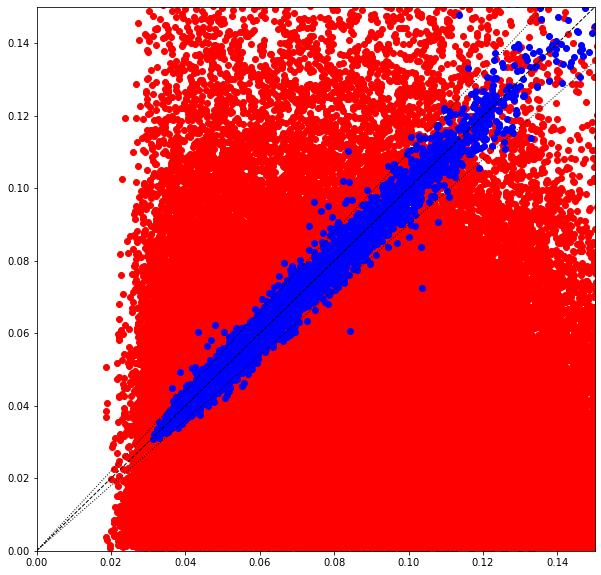

In [18]:
fig= plt.figure( figsize=(10,10) )

msk_bkg = ( y_test_pred == 0 )
msk_sig = ( y_test_pred == 1 )

plt.plot( X_test[ "Xi" ][ msk_bkg ], X_test[ "XiMuMu" ][ msk_bkg ], 'ro' )
plt.plot( X_test[ "Xi" ][ msk_sig ], X_test[ "XiMuMu" ][ msk_sig ], 'bo' )
plt.plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
plt.plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
plt.plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
plt.xlim(0.,0.15)
plt.ylim(0.,0.15)

In [19]:
y_sig_pred = clf.predict( X_sig )
y_bkg_pred = clf.predict( X_bkg )
print ( y_sig_pred )
print ( y_bkg_pred )
print ( accuracy_score( y_sig, y_sig_pred ) )
print ( accuracy_score( y_bkg, y_bkg_pred ) )

[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
0.9979770039014925
0.9998867954368572


(0.0, 0.15)

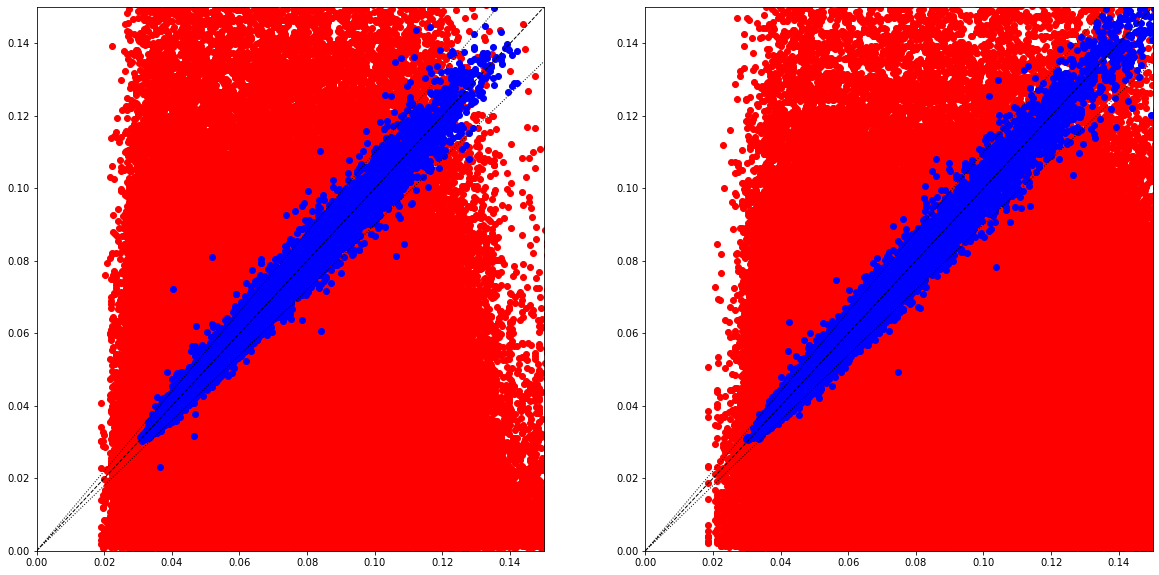

In [20]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_bkg_1 = None
msk_bkg_2 = None
msk_sig_1 = None
msk_sig_2 = None
if proton_selection == "SingleRP":
    msk_bkg_1 = ( df_bkg[ "RPId1" ] == 23 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg[ "RPId1" ] == 123 ) & ( y_bkg_pred == 0 )
    msk_sig_1 = ( df_signal[ "RPId1" ] == 23 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal[ "RPId1" ] == 123 ) & ( y_sig_pred == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_1 = ( df_bkg[ "Arm" ] == 0 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg[ "Arm" ] == 1 ) & ( y_bkg_pred == 0 )
    msk_sig_1 = ( df_signal[ "Arm" ] == 0 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal[ "Arm" ] == 1 ) & ( y_sig_pred == 1 )
    
axes[0].plot( df_bkg[ "Xi" ][ msk_bkg_1 ], df_bkg[ "XiMuMuPlus" ][ msk_bkg_1 ], 'ro' )
axes[0].plot( df_signal[ "Xi" ][ msk_sig_1 ], df_signal[ "XiMuMuPlus" ][ msk_sig_1 ], 'bo' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_bkg[ "Xi" ][ msk_bkg_2 ], df_bkg[ "XiMuMuMinus" ][ msk_bkg_2 ], 'ro' )
axes[1].plot( df_signal[ "Xi" ][ msk_sig_2 ], df_signal[ "XiMuMuMinus" ][ msk_sig_2 ], 'bo' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(0.0, 0.15)

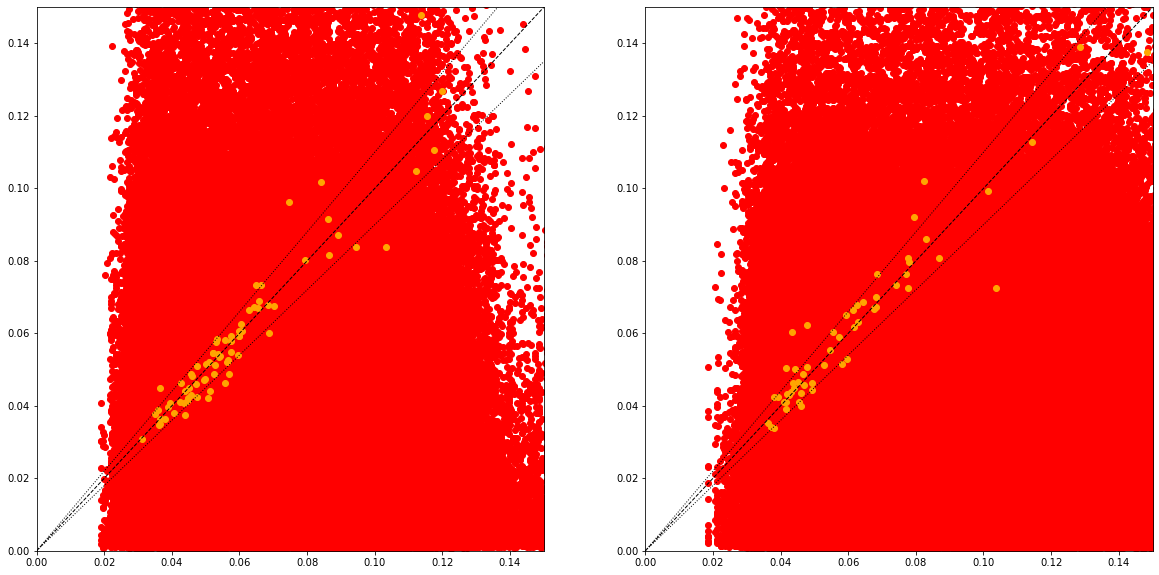

In [21]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_bkg_1 = None
msk_bkg_2 = None
msk_bkgerr_1 = None
msk_bkgerr_2 = None
if proton_selection == "SingleRP":
    msk_bkg_1 = ( df_bkg[ "RPId1" ] == 23 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg[ "RPId1" ] == 123 ) & ( y_bkg_pred == 0 )
    msk_bkgerr_1 = ( df_bkg[ "RPId1" ] == 23 ) & ( y_bkg_pred == 1 )
    msk_bkgerr_2 = ( df_bkg[ "RPId1" ] == 123 ) & ( y_bkg_pred == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_1 = ( df_bkg[ "Arm" ] == 0 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg[ "Arm" ] == 1 ) & ( y_bkg_pred == 0 )
    msk_bkgerr_1 = ( df_bkg[ "Arm" ] == 0 ) & ( y_bkg_pred == 1 )
    msk_bkgerr_2 = ( df_bkg[ "Arm" ] == 1 ) & ( y_bkg_pred == 1 )
    
axes[0].plot( df_bkg[ "Xi" ][ msk_bkg_1 ], df_bkg[ "XiMuMuPlus" ][ msk_bkg_1 ], 'ro' )
axes[0].plot( df_bkg[ "Xi" ][ msk_bkgerr_1 ], df_bkg[ "XiMuMuPlus" ][ msk_bkgerr_1 ], 'o', color='orange' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_bkg[ "Xi" ][ msk_bkg_2 ], df_bkg[ "XiMuMuMinus" ][ msk_bkg_2 ], 'ro' )
axes[1].plot( df_bkg[ "Xi" ][ msk_bkgerr_2 ], df_bkg[ "XiMuMuMinus" ][ msk_bkgerr_2 ], 'o', color='orange' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(0.0, 0.15)

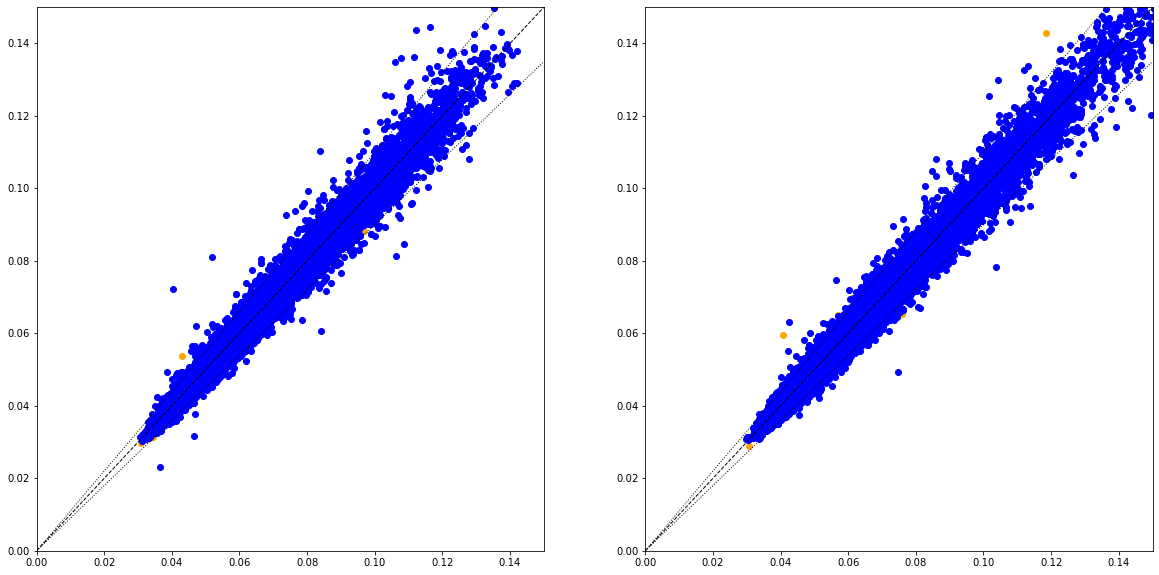

In [22]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_sigerr_1 = None
msk_sigerr_2 = None
msk_sig_1 = None
msk_sig_2 = None
if proton_selection == "SingleRP":
    msk_sigerr_1 = ( df_signal[ "RPId1" ] == 23 ) & ( y_sig_pred == 0 )
    msk_sigerr_2 = ( df_signal[ "RPId1" ] == 123 ) & ( y_sig_pred == 0 )
    msk_sig_1 = ( df_signal[ "RPId1" ] == 23 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal[ "RPId1" ] == 123 ) & ( y_sig_pred == 1 )
elif proton_selection == "MultiRP":
    msk_sigerr_1 = ( df_signal[ "Arm" ] == 0 ) & ( y_sig_pred == 0 )
    msk_sigerr_2 = ( df_signal[ "Arm" ] == 1 ) & ( y_sig_pred == 0 )
    msk_sig_1 = ( df_signal[ "Arm" ] == 0 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal[ "Arm" ] == 1 ) & ( y_sig_pred == 1 )

axes[0].plot( df_signal[ "Xi" ][ msk_sigerr_1 ], df_signal[ "XiMuMuPlus" ][ msk_sigerr_1 ], 'o', color='orange' )
axes[0].plot( df_signal[ "Xi" ][ msk_sig_1 ], df_signal[ "XiMuMuPlus" ][ msk_sig_1 ], 'bo' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_signal[ "Xi" ][ msk_sigerr_2 ], df_signal[ "XiMuMuMinus" ][ msk_sigerr_2 ], 'o', color='orange' )
axes[1].plot( df_signal[ "Xi" ][ msk_sig_2 ], df_signal[ "XiMuMuMinus" ][ msk_sig_2 ], 'bo' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(array([58.88944962, 61.44986048, 58.44416078, 63.11969364, 57.96176453,
        55.54978329, 57.10829425, 55.73532031, 56.03217954, 57.51647569,
        55.32713887, 53.17490946, 57.44226088, 55.03027964, 55.17870926,
        57.99887193, 51.80193552, 54.99317224, 53.17490946, 54.43656118,
        52.17300956, 52.02457994, 51.35664668, 52.09879475, 52.87805023,
        48.64780621, 47.97987294, 49.98367274, 44.89995844, 45.19681767,
        50.05788755, 43.00748085, 46.94086564, 47.4974767 , 44.4546696 ,
        45.71632132, 44.89995844, 47.16351006, 46.38425459, 45.97607315,
        45.82764353, 43.23012527, 42.67351422, 41.26343288, 41.96847355,
        41.15211067, 35.3633557 , 39.22252568, 41.18921807, 38.4061628 ]),
 array([0.    , 0.0004, 0.0008, 0.0012, 0.0016, 0.002 , 0.0024, 0.0028,
        0.0032, 0.0036, 0.004 , 0.0044, 0.0048, 0.0052, 0.0056, 0.006 ,
        0.0064, 0.0068, 0.0072, 0.0076, 0.008 , 0.0084, 0.0088, 0.0092,
        0.0096, 0.01  , 0.0104, 0.0108, 0.0112, 0.01

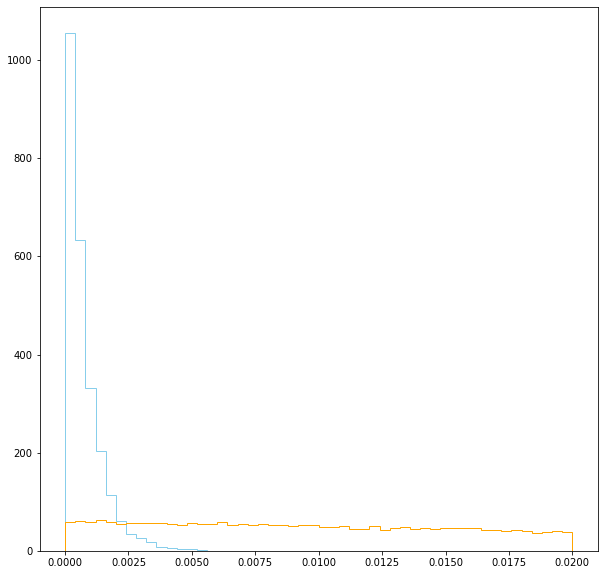

In [23]:
fig = plt.figure( figsize=(10,10) )
plt.hist( X_test[ "Acopl" ][ y_test_pred == 1 ], histtype='step', color='skyblue', bins=50, range=(0.,0.02), density=True )
plt.hist( X_test[ "Acopl" ][ y_test_pred == 0 ], histtype='step', color='orange', bins=50, range=(0.,0.02), density=True )

(array([0.00320767, 0.00271769, 0.00387997, 0.00506504, 0.00660335,
        0.00754343, 0.00875699, 0.0105061 , 0.0109733 , 0.01286485,
        0.0143291 , 0.01495012, 0.01646564, 0.01694423, 0.01886997,
        0.01886427, 0.02009492, 0.0216959 , 0.02130278, 0.02375838,
        0.02292086, 0.02355897, 0.02354188, 0.02511438, 0.02521123,
        0.02602597, 0.02558157, 0.02620829, 0.02571261, 0.0261798 ,
        0.02697744, 0.02621398, 0.02700023, 0.02620829, 0.02545053,
        0.02596899, 0.0248409 , 0.02453893, 0.02480102, 0.02517705,
        0.02410593, 0.02385524, 0.02253343, 0.02167311, 0.02189531,
        0.02130278, 0.01986702, 0.02018608, 0.019246  , 0.0387085 ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 1 Patch objects>)

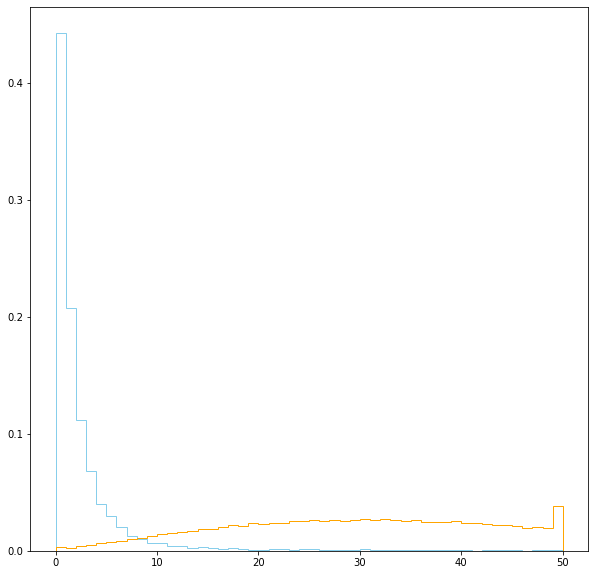

In [24]:
fig = plt.figure( figsize=(10,10) )
plt.hist( X_test[ "ExtraPfCands" ][ y_test_pred == 1 ], histtype='step', color='skyblue', bins=50, range=(0,50), density=True )
plt.hist( X_test[ "ExtraPfCands" ][ y_test_pred == 0 ], histtype='step', color='orange', bins=50, range=(0,50), density=True )

In [25]:
y_test_probs = clf.predict_proba( X_test )

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 2.100e+01, 7.100e+01, 1.563e+03, 5.753e+03, 1.646e+03,
        4.190e+02, 1.110e+02, 2.100e+01, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

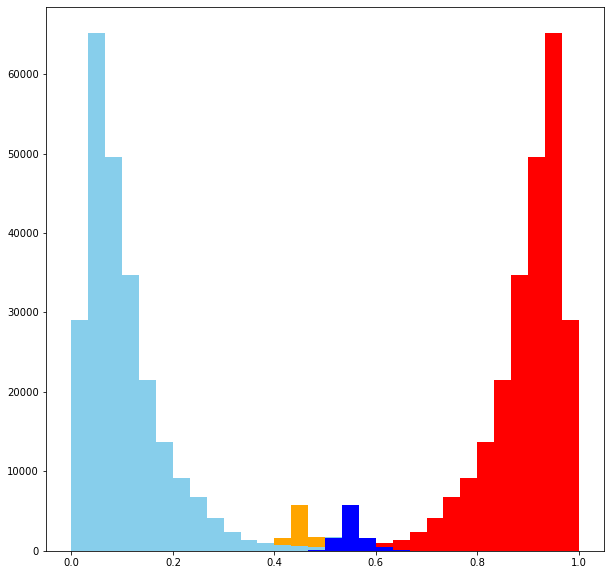

In [26]:
fig = plt.figure( figsize=(10,10) )
plt.hist( y_test_probs[:,0], color='orange', bins=30, range=(0.,1.) )
plt.hist( y_test_probs[:,1], color='skyblue', bins=30, range=(0.,1.) )
plt.hist( y_test_probs[:,0][ y_test == 0 ], color='red', bins=30, range=(0.,1.) )
plt.hist( y_test_probs[:,1][ y_test == 1 ], color='blue', bins=30, range=(0.,1.) )

In [27]:
y_test_probs[:,0]

array([0.79877882, 0.87394638, 0.95917229, ..., 0.94742623, 0.77018589,
       0.82959375])

## Data

In [28]:
df_data_list = []
df_counts_data_list = []

fileNames = [
    'output/output-UL2017B-PreSel.h5',
    'output/output-UL2017C1-PreSel.h5',
    'output/output-UL2017D-PreSel.h5',
    'output/output-UL2017F1-PreSel.h5'
]

for file_ in fileNames:
    with h5py.File( file_, 'r' ) as f:
        print ( f )
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )  
        
        dset_counts = f['event_counts']
        df_counts_data_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_data_list[-1] )
        
        chunk_size = 1000000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_ = pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str )
            df_ = df_[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
                        'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                        'Xi', 'T', 'ThX', 'ThY', 'Time',
                        'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
            df_data_list.append( df_ )
            print ( df_data_list[-1].head() )
            print ( len( df_data_list[-1] ) )
        

<HDF5 file "output-UL2017B-PreSel.h5" (mode r)>
['columns', 'event_counts', 'protons', 'selections']
(107075, 38)
[[2.97227000e+05 5.30000000e+01 2.29700000e+03 ... 9.83012105e-01
  5.61954090e-02 4.09129155e-03]
 [2.97227000e+05 5.50000000e+01 8.67000000e+02 ... 1.32611728e-01
  1.95323438e-03 4.83462101e-02]
 [2.97227000e+05 5.50000000e+01 8.67000000e+02 ... 1.32611728e-01
  1.95323438e-03 4.83462101e-02]
 ...
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'T

      Run  LumiSection  EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
0  302031            1    431887          150.0        0 -999     23     -1   
1  302031            1    431887          150.0        0 -999     23     -1   
2  302031            1    431887          150.0        0 -999     23     -1   
3  302031            1   1151281          150.0        0 -999     23     -1   
4  302031            1   1151281          150.0        0 -999     23     -1   

     TrackX1   TrackY1  ...  ThX       ThY  Time    Muon0Pt    Muon1Pt  \
0   6.012390 -0.689880  ...  0.0  0.000034   0.0  55.632298  55.336308   
1   7.552979  0.701904  ...  0.0 -0.000025   0.0  55.632298  55.336308   
2  12.666504 -1.827759  ...  0.0  0.000034   0.0  55.632298  55.336308   
3   7.412109 -0.498108  ...  0.0  0.000018   0.0  97.685287  50.115246   
4  10.405884  3.087402  ...  0.0 -0.000073   0.0  97.685287  50.115246   

      InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  119.691734  

In [29]:
df_counts_data = df_counts_data_list[0];
for idx in range( 1, len(df_counts_data_list) ):
    df_counts_data = df_counts_data.add( df_counts_data_list[idx] )
df_counts_data

All        31108565
Muon         308240
Vertex       285916
Protons      223649
dtype: int64

In [30]:
df_data = pd.concat( df_data_list )

In [31]:
msk_data = ( df_data["InvMass"] >= 110. )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_arm = ( df_data["RPId1"] == 23 )
    msk2_arm = ( df_data["RPId1"] == 123 )
    df_data[ "XiMuMu" ] = np.nan
    df_data[ "XiMuMu" ].where( ~msk1_arm, df_data[ "XiMuMuPlus" ], inplace=True )
    df_data[ "XiMuMu" ].where( ~msk2_arm, df_data[ "XiMuMuMinus" ], inplace=True )
    msk1_data = msk_data & ( df_data["MultiRP"] == 0) & msk1_arm
    msk2_data = msk_data & ( df_data["MultiRP"] == 0) & msk2_arm
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_arm = ( df_data["Arm"] == 0 )
    msk2_arm = ( df_data["Arm"] == 1 )
    df_data[ "XiMuMu" ] = np.nan
    df_data[ "XiMuMu" ].where( ~msk1_arm, df_data[ "XiMuMuPlus" ], inplace=True )
    df_data[ "XiMuMu" ].where( ~msk2_arm, df_data[ "XiMuMuMinus" ], inplace=True )
    msk1_data = msk_data & ( df_data["MultiRP"] == 1 ) & msk1_arm
    msk2_data = msk_data & ( df_data["MultiRP"] == 1 ) & msk2_arm

df_data = df_data[ msk1_data | msk2_data ]
df_data[:20]

,Run,LumiSection,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,...,ThY,Time,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu
3,297227,55,38079658,120.0,1,1,103,123,4.577393,1.367676,...,-0.000014,0.0,63.340645,62.493637,123.616515,27,0.132612,0.001953,0.048346,0.048346
6,297227,56,38791639,120.0,1,1,103,123,8.585938,2.644531,...,0.000024,0.0,65.270454,65.022888,152.786010,29,0.058782,0.002211,0.062855,0.062855
39,297227,71,50687027,120.0,1,0,3,23,5.214844,-0.371826,...,0.000093,0.0,126.357605,113.611771,270.992400,27,0.016921,0.010428,0.041786,0.010428
48,297227,73,52238047,120.0,1,1,103,123,5.372803,0.135132,...,0.000031,0.0,86.516212,56.114479,138.904508,10,0.060892,0.014483,0.008333,0.008333
51,297227,74,52411722,120.0,1,1,103,123,4.895752,-0.607605,...,0.000121,0.0,111.228539,96.216682,211.304828,37,0.308182,0.016115,0.019881,0.019881
61,297227,75,53449355,120.0,1,0,3,23,12.326172,-1.268066,...,0.000065,0.0,74.069061,62.750038,159.699672,53,0.023202,0.019344,0.007848,0.019344
70,297227,76,54126334,120.0,1,1,103,123,3.238647,1.550049,...,-0.000029,0.0,75.266441,69.694183,223.032419,59,0.145185,0.049092,0.006129,0.006129
73,297227,78,56185410,120.0,1,1,103,123,5.210449,-1.396362,...,0.000116,0.0,57.649437,56.255272,111.417341,25,0.141610,0.014498,0.005325,0.005325
101,297227,91,66200794,120.0,1,1,103,123,11.390625,4.910645,...,0.000011,0.0,73.228600,69.507820,143.137057,22,0.010714,0.009334,0.013000,0.013000
109,297227,94,68360749,120.0,1,0,3,23,5.153076,1.484619,...,-0.000047,0.0,82.481186,53.035610,110.397725,63,0.410358,0.090327,0.001269,0.090327


In [32]:
X_data = df_data[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_data[:20]

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
3,0.067306,63.340645,62.493637,123.616515,27,0.132612,0.048346
6,0.102869,65.270454,65.022888,152.786010,29,0.058782,0.062855
39,0.039614,126.357605,113.611771,270.992400,27,0.016921,0.010428
48,0.052213,86.516212,56.114479,138.904508,10,0.060892,0.008333
51,0.045295,111.228539,96.216682,211.304828,37,0.308182,0.019881
61,0.104492,74.069061,62.750038,159.699672,53,0.023202,0.019344
70,0.055042,75.266441,69.694183,223.032419,59,0.145185,0.006129
73,0.056894,57.649437,56.255272,111.417341,25,0.141610,0.005325
101,0.122168,73.228600,69.507820,143.137057,22,0.010714,0.013000
109,0.052344,82.481186,53.035610,110.397725,63,0.410358,0.090327


In [33]:
y_data = clf.predict( X_data )
y_data

array([0., 0., 0., ..., 0., 0., 0.])

(0.0, 0.15)

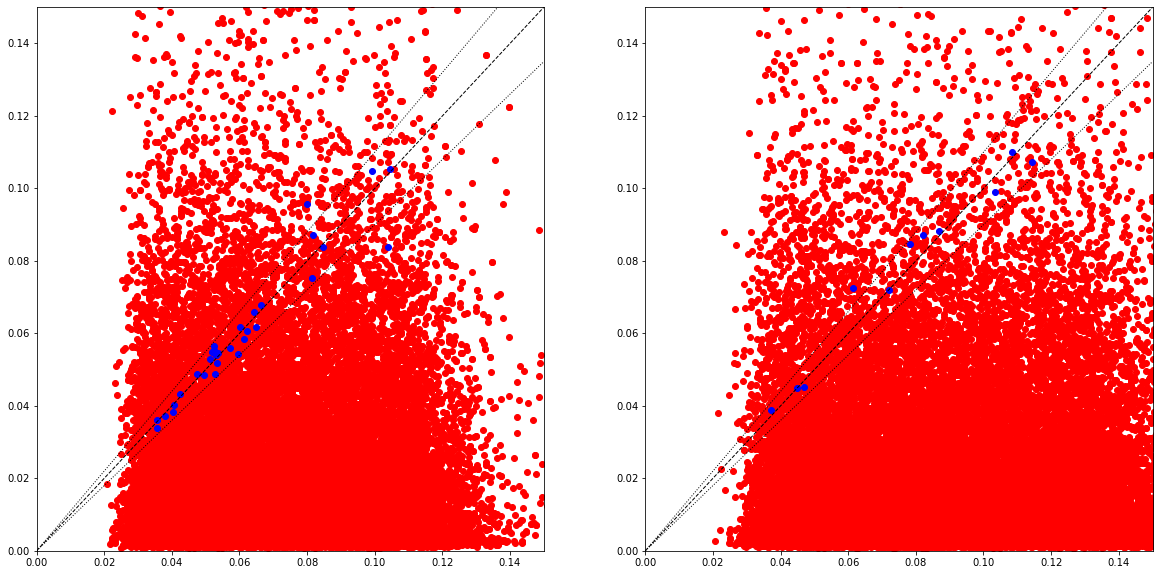

In [34]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_bkg_1 = None
msk_bkg_2 = None
msk_sig_1 = None
msk_sig_2 = None
if proton_selection == "SingleRP":
    msk_bkg_1 = ( df_data[ "RPId1" ] == 23 ) & ( y_data == 0 )
    msk_bkg_2 = ( df_data[ "RPId1" ] == 123 ) & ( y_data == 0 )
    msk_sig_1 = ( df_data[ "RPId1" ] == 23 ) & ( y_data == 1 )
    msk_sig_2 = ( df_data[ "RPId1" ] == 123 ) & ( y_data == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_1 = ( df_data[ "Arm" ] == 0 ) & ( y_data == 0 )
    msk_bkg_2 = ( df_data[ "Arm" ] == 1 ) & ( y_data == 0 )
    msk_sig_1 = ( df_data[ "Arm" ] == 0 ) & ( y_data == 1 )
    msk_sig_2 = ( df_data[ "Arm" ] == 1 ) & ( y_data == 1 )

axes[0].plot( df_data[ "Xi" ][ msk_bkg_1 ], df_data[ "XiMuMuPlus" ][ msk_bkg_1 ], 'ro' )
axes[0].plot( df_data[ "Xi" ][ msk_sig_1 ], df_data[ "XiMuMuPlus" ][ msk_sig_1 ], 'bo' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_data[ "Xi" ][ msk_bkg_2 ], df_data[ "XiMuMuMinus" ][ msk_bkg_2 ], 'ro' )
axes[1].plot( df_data[ "Xi" ][ msk_sig_2 ], df_data[ "XiMuMuMinus" ][ msk_sig_2 ], 'bo' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(array([54.38316486, 60.1465981 , 61.77218183, 59.85103742, 57.48655199,
        55.71318792, 61.77218183, 56.45208961, 48.76751197, 57.33877165,
        56.0087486 , 56.45208961, 57.63433233, 52.90536147, 52.90536147,
        59.70325708, 57.33877165, 56.89543063, 52.60980079, 55.41762724,
        59.11213572, 50.3930957 , 46.40302654, 49.21085299, 54.97428622,
        45.66412484, 45.22078383, 42.8562984 , 44.33410179, 44.48188213,
        48.17639061, 41.52627534, 49.06307265, 47.88082993, 42.1173967 ,
        48.02861027, 47.58526926, 46.10746586, 47.7330496 , 46.9941479 ,
        43.89076077, 47.14192824, 41.52627534, 44.33410179, 42.70851806,
        41.82183602, 42.1173967 , 36.79730449, 43.00407874, 37.2406455 ]),
 array([0.    , 0.0004, 0.0008, 0.0012, 0.0016, 0.002 , 0.0024, 0.0028,
        0.0032, 0.0036, 0.004 , 0.0044, 0.0048, 0.0052, 0.0056, 0.006 ,
        0.0064, 0.0068, 0.0072, 0.0076, 0.008 , 0.0084, 0.0088, 0.0092,
        0.0096, 0.01  , 0.0104, 0.0108, 0.0112, 0.01

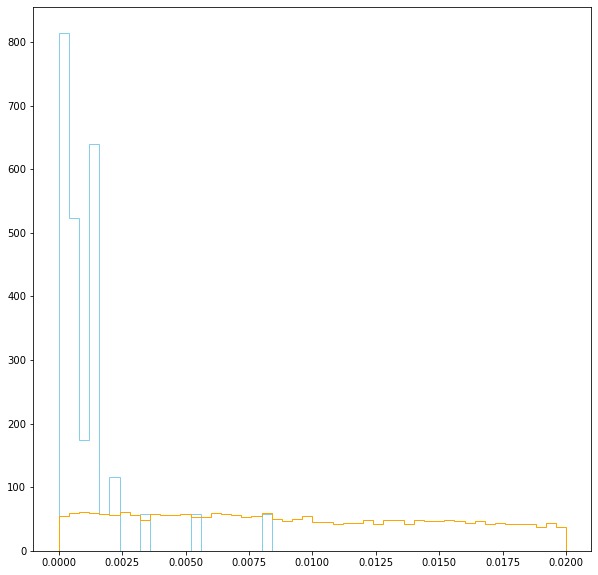

In [35]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data[ "Acopl" ][ y_data == 1 ], histtype='step', color='skyblue', bins=50, range=(0.,0.02), density=True )
plt.hist( df_data[ "Acopl" ][ y_data == 0 ], histtype='step', color='orange', bins=50, range=(0.,0.02), density=True )

(array([0.00367948, 0.0024757 , 0.00386118, 0.00572363, 0.00629145,
        0.00817661, 0.00894885, 0.01008449, 0.01131098, 0.0125829 ,
        0.01367312, 0.01553557, 0.01562642, 0.01785228, 0.01814754,
        0.01910148, 0.02064595, 0.02062324, 0.02148633, 0.02466612,
        0.0237349 , 0.02423458, 0.02332607, 0.02455256, 0.02607432,
        0.02661942, 0.0249841 , 0.02562006, 0.02509767, 0.02650586,
        0.02636958, 0.02646043, 0.02625602, 0.02648315, 0.0249841 ,
        0.02636958, 0.02541564, 0.02439357, 0.02457527, 0.02482511,
        0.02332607, 0.02432543, 0.02200872, 0.02203143, 0.02164532,
        0.02209957, 0.02050968, 0.01962388, 0.01810212, 0.03895248]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 1 Patch objects>)

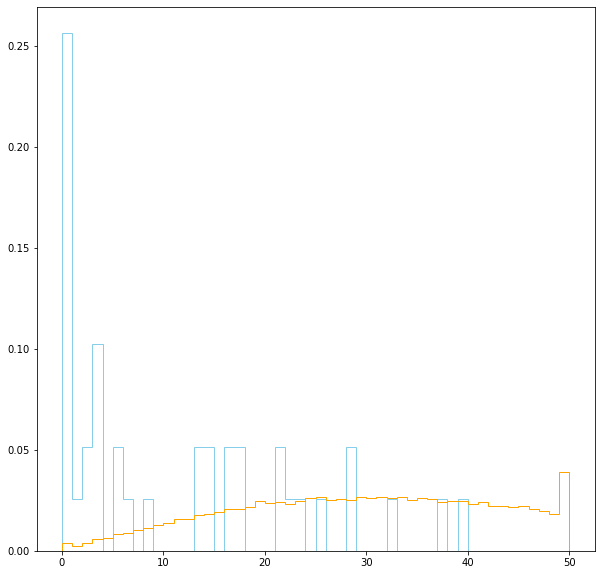

In [36]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data[ "ExtraPfCands" ][ y_data == 1 ], histtype='step', color='skyblue', bins=50, range=(0,50), density=True )
plt.hist( df_data[ "ExtraPfCands" ][ y_data == 0 ], histtype='step', color='orange', bins=50, range=(0,50), density=True )

y max. = 24.0


(0.0, 24.0)

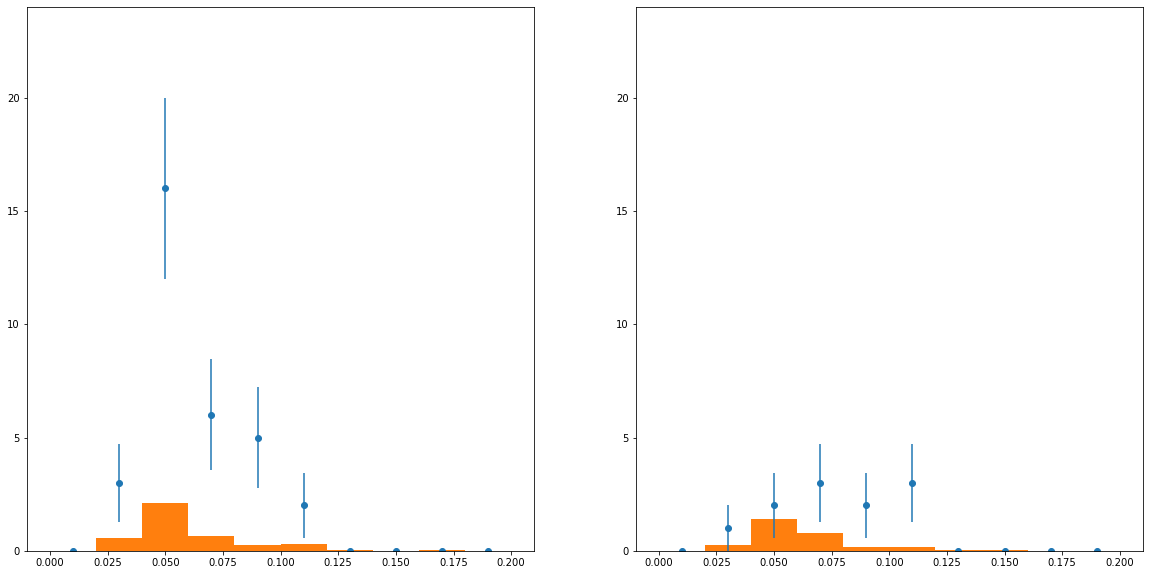

In [50]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

#var_ = "Xi"
#bins_ = 10
#range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

#var_ = "ThY"
#bins_ = 10
#range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

#var_ = "Time"
#bins_ = 20
#range_ = (-0.5,0.5)

#var_ = "Muon0Pt"
#bins_ = 10
#range_ = (50.,200.)

#var_ = "InvMass"
#bins_ = 10
#range_ = (110.,500.)

#var_ = "Acopl"
#bins_ = 10
#range_ = (0.,0.01)

#var_ = "ExtraPfCands"
#bins_ = 20
#range_ = (0,20)

msk_data_1 = None
msk_data_2 = None
if proton_selection == "SingleRP":
    msk_data_1 = ( df_data[ "RPId1" ] == 23 ) & ( y_data == 1 )
    msk_data_2 = ( df_data[ "RPId1" ] == 123 ) & ( y_data == 1 )
elif proton_selection == "MultiRP":
    msk_data_1 = ( df_data[ "Arm" ] == 0 ) & ( y_data == 1 )
    msk_data_2 = ( df_data[ "Arm" ] == 1 ) & ( y_data == 1 )

counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk_data_1 ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk_data_2 ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

msk_bkg_pred_1 = None
msk_bkg_pred_2 = None
if proton_selection == "SingleRP":
    msk_bkg_pred_1 = ( df_bkg[ "RPId1" ] == 23 ) & ( y_bkg_pred == 1 )
    msk_bkg_pred_2 = ( df_bkg[ "RPId1" ] == 123 ) & ( y_bkg_pred == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_pred_1 = ( df_bkg[ "Arm" ] == 0 ) & ( y_bkg_pred == 1 )
    msk_bkg_pred_2 = ( df_bkg[ "Arm" ] == 1 ) & ( y_bkg_pred == 1 )

weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df_bkg[ "Xi" ][ msk_bkg_pred_1 ], ( 1./resample_factor ) )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df_bkg[ "Xi" ][ msk_bkg_pred_2 ], ( 1./resample_factor ) )

axes[0].hist( df_bkg[ var_ ][ msk_bkg_pred_1 ], bins=bins_, range=range_, weights=weights_1 )
axes[1].hist( df_bkg[ var_ ][ msk_bkg_pred_2 ], bins=bins_, range=range_, weights=weights_2 )
    
axes[0].set_ylim( top=y_max )
axes[1].set_ylim( top=y_max )

y max. = 24.0


(0.0, 24.0)

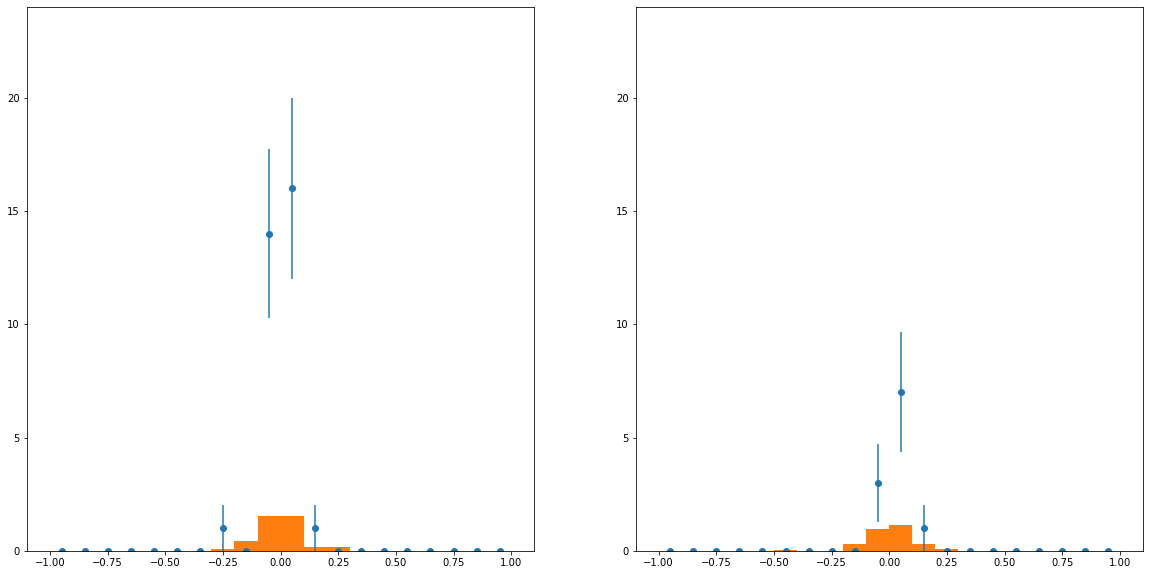

In [53]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 20
range_ = (-1.,1.)

vals_data = ( 1. - df_data[ "Xi" ] / df_data[ "XiMuMu" ] )

counts_1, bin_edges_1 = np.histogram( vals_data[ msk_data_1 ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

counts_2, bin_edges_2 = np.histogram( vals_data[ msk_data_2 ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

vals_bkg = ( 1. - df_bkg[ "Xi" ] / df_bkg[ "XiMuMu" ] )

axes[0].hist( vals_bkg[ msk_bkg_pred_1 ], bins=bins_, range=range_, weights=weights_1 )
axes[1].hist( vals_bkg[ msk_bkg_pred_2 ], bins=bins_, range=range_, weights=weights_2 )
    
axes[0].set_ylim( top=y_max )
axes[1].set_ylim( top=y_max )